Predicting the final scores of the student based on many features of the dataset.
Note:Considering only Maths Class Students.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame,Series
import sys

In [41]:
fname='student-mat.csv'
data=pd.read_csv(fname)

In [42]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [44]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


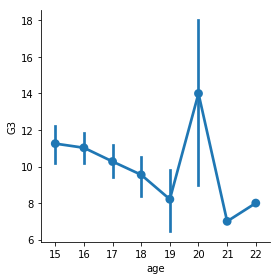

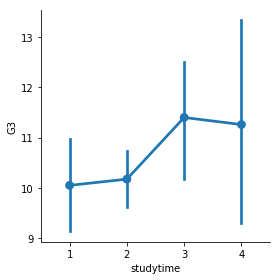

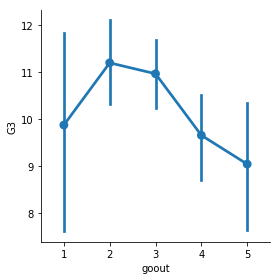

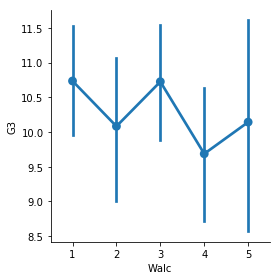

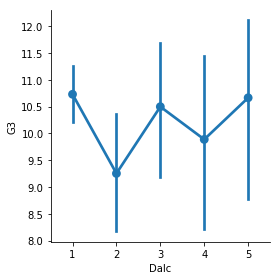

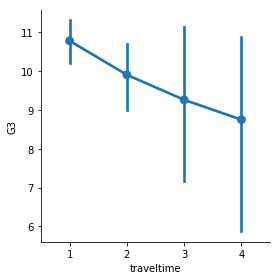

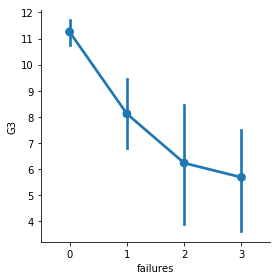

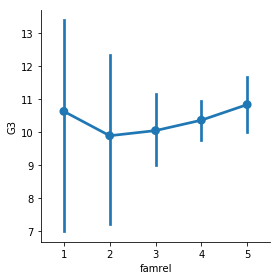

In [45]:
sns.factorplot('age','G3',data = data)
sns.factorplot('studytime','G3',data = data)
sns.factorplot('goout','G3',data = data)
sns.factorplot('Walc','G3',data = data)
sns.factorplot('Dalc','G3',data = data)
sns.factorplot('traveltime','G3',data = data)
sns.factorplot('failures','G3',data = data)
sns.factorplot('famrel','G3',data = data)

In [46]:
data=pd.DataFrame(data)

In [47]:
str_list = []
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)         
num_list = data.columns.difference(str_list) 
print(str_list)
print(num_list)
data_matnum = data[num_list]

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Index(['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age',
       'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime',
       'traveltime'],
      dtype='object')


In [48]:
y_train = data_matnum['G3']
x_train = data_matnum
x_train .drop(['G3'], axis=1,inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [49]:
number_of_samples = len(y_train)
print(len(y_train))
np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
X_train = x_train.iloc[random_indices[:num_training_samples]]
Y_train= y_train.iloc[random_indices[:num_training_samples]]
X_test= x_train.iloc[random_indices[num_training_samples:]]
Y_test=y_train.iloc[random_indices[num_training_samples:]]
Y_Train=list(Y_train)

395


In [50]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
y1_lr=regr.predict(X_train) 
y1_lr=list(y1_lr)
train_error_lr = np.mean(abs(y1_lr-Y_train))
print(train_error_lr)
y_test=regr.predict(X_test) 
y_predict=list(y_test)
test_error_lr = np.mean(abs(y_predict-Y_test))
print(test_error_lr)

1.1953673375700051
1.095321035918673


In [51]:
from sklearn import neighbors

n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,Y_train)
y1_knn=knn.predict(X_train)
y1_knn=list(y1_knn)

train_error_knn = np.mean(abs(y1_knn-Y_train))
print(train_error_knn)

y_test=knn.predict(X_test)
y_Predict=list(y_test)
test_error_knn = np.mean(abs(y_Predict-Y_test))
print(test_error_knn)

1.0317567567567558
1.084848484848485


In [52]:
from sklearn import svm
svm_reg=svm.SVR()
svm_reg.fit(X_train,Y_train)
y1_svm=svm_reg.predict(X_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(X_test)
y2_svm=list(y2_svm)

train_error_svm = np.mean(abs(y1_svm-Y_train))
train_error_svm_std = np.std(abs(y1_svm-Y_train))
print(train_error_svm)

test_error_svm = np.mean(abs(y2_svm-Y_test))
print(test_error_svm)

1.5364363829519134
1.974694063931135


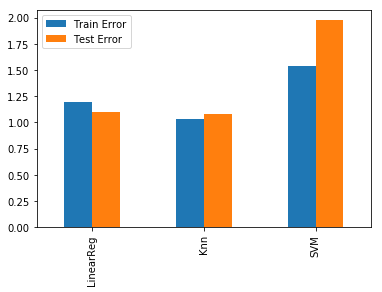

In [53]:
train_error=[train_error_lr,train_error_knn,train_error_svm]
test_error=[test_error_lr,test_error_knn,test_error_svm]

col={'Train Error':train_error,'Test Error':test_error}
models=["LinearReg",'Knn','SVM']
df=DataFrame(data=col,index=models)
df.plot(kind='bar')